# CLOUD CONDITION PREDICTION

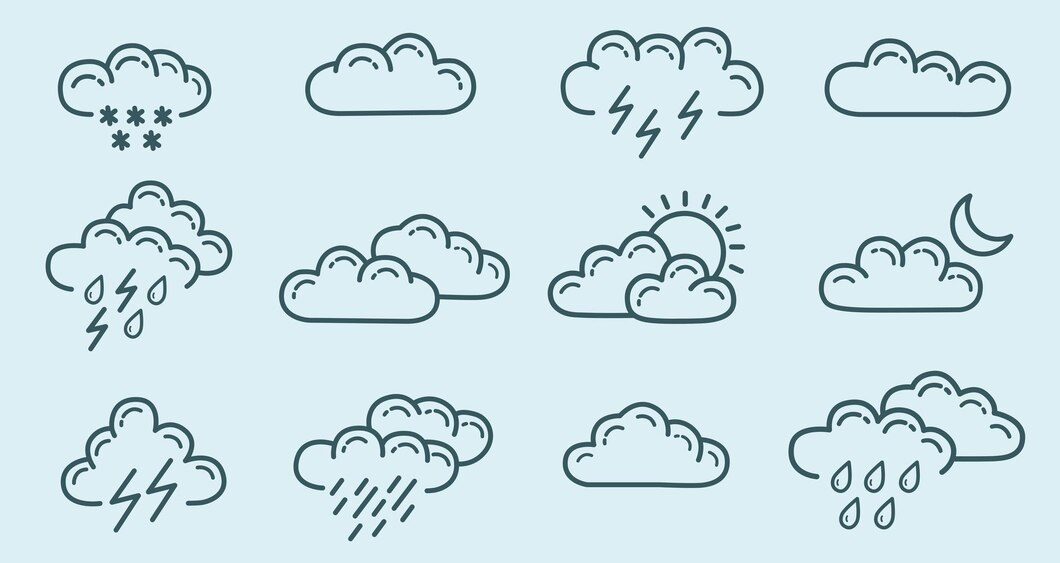

##### IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)

In [2]:
training_data = pd.read_csv(r"train_CloudCondition.csv")
testing_data = pd.read_csv(r"test_CloudCondition.csv")

In [3]:
training_data.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,rain,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,Frost,1068
1,2,Partly Cloudy,rain,15,5.0,0.847434,8.0,291.0,2.0,1036.0,Frost,1291
2,3,Partly Cloudy,rain,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,Dry,1433
3,4,Partly Cloudy,snow,30,36.0,0.255069,15.0,130.0,3.0,1016.0,Dry,1410
4,5,Partly Cloudy,snow,27,30.0,0.495435,63.0,60.0,15.0,1007.0,Fog,1391


In [4]:
testing_data.head()

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,80002,rain,1.0,0.0,0.078150,17.0,300,10.0,1029.0,Fog,1399
1,80003,rain,-3.0,25.0,0.653251,25.0,322,0.0,1009.0,Dry,1468
2,80004,rain,18.0,17.0,0.930970,37.0,330,12.0,1045.0,Dry,1152
3,80005,rain,33.0,-12.0,0.778844,50.0,350,3.0,1022.0,Fog,1003
4,80006,rain,25.0,-19.0,0.491523,62.0,300,12.0,1042.0,Fog,1228


In [5]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71428 entries, 0 to 71427
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         71428 non-null  int64  
 1   Cloud_Condition             71428 non-null  object 
 2   Rain_OR_SNOW                71313 non-null  object 
 3   Temperature (C)             71176 non-null  object 
 4   Apparent Temperature (C)    71425 non-null  float64
 5   Humidity                    71427 non-null  float64
 6   Wind Speed (km/h)           71426 non-null  float64
 7   Wind Bearing (degrees)      71391 non-null  float64
 8   Visibility (km)             71408 non-null  float64
 9   Pressure (millibars)        71363 non-null  float64
 10  Condensation                71428 non-null  object 
 11  Solar irradiance intensity  71428 non-null  int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 6.5+ MB


##### missing value seen in some features

In [6]:
testing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16452 entries, 0 to 16451
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Day                         16452 non-null  int64  
 1   Rain_OR_SNOW                16452 non-null  object 
 2   Temperature (C)             16452 non-null  float64
 3   Apparent Temperature (C)    16452 non-null  float64
 4   Humidity                    16452 non-null  float64
 5   Wind Speed (km/h)           16452 non-null  float64
 6   Wind Bearing (degrees)      16452 non-null  int64  
 7   Visibility (km)             16452 non-null  float64
 8   Pressure (millibars)        16452 non-null  float64
 9   Condensation                16452 non-null  object 
 10  Solar irradiance intensity  16452 non-null  int64  
dtypes: float64(6), int64(3), object(2)
memory usage: 1.4+ MB


##### pre-processing

In [7]:
print(training_data.isnull().sum())

Day                             0
Cloud_Condition                 0
Rain_OR_SNOW                  115
Temperature (C)               252
Apparent Temperature (C)        3
Humidity                        1
Wind Speed (km/h)               2
Wind Bearing (degrees)         37
Visibility (km)                20
Pressure (millibars)           65
Condensation                    0
Solar irradiance intensity      0
dtype: int64


In [8]:
print(testing_data.isnull().sum())

Day                           0
Rain_OR_SNOW                  0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Condensation                  0
Solar irradiance intensity    0
dtype: int64


##### CHECKING FOR UNIQUE VALUES

In [9]:
for i in training_data.columns:
    print({i:training_data[i].unique()})

{'Day': array([    1,     2,     3, ..., 79998, 79999, 80000], dtype=int64)}
{'Cloud_Condition': array(['Partly Cloudy', 'Light Rain', 'Breezy and Dry', 'Overcast',
       'Foggy', 'Breezy and Mostly Cloudy', 'Clear',
       'Breezy and Partly Cloudy', 'Breezy and Overcast',
       'Humid and Mostly Cloudy', 'Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy'], dtype=object)}
{'Rain_OR_SNOW': array(['rain', 'snow', nan], dtype=object)}
{'Temperature (C)': array(['-13', '15', '33', '30', '27', '-17', '-5', '-14', '10', '7', '9',
       '20', '3', '29', '-8', '-15', '-20', '36', '32', '6', '17', '28',
       '-21', '23', '-4', '25', '-7', '16', '39', '-1', '13', '35', '22',
      

##### REPLACING UNIQUE VALUES WITH NAN

In [10]:
training_data=training_data.replace('-', np.nan)
testing_data=testing_data.replace('-', np.nan)

##### REPLACING UNIQUE VALUES WITH MODE 

In [11]:
for value in ['Rain_OR_SNOW', 'Temperature (C)','Apparent Temperature (C)','Humidity','Wind Speed (km/h)',
              'Wind Bearing (degrees)','Visibility (km)','Pressure (millibars)']:
    training_data[value].fillna(training_data[value].mode()[0],inplace=True)

In [12]:
training_data['Temperature (C)'] = training_data['Temperature (C)'].astype(int)
testing_data['Temperature (C)'] = testing_data['Temperature (C)'].astype(int)

In [13]:
print(training_data.isnull().sum())

Day                           0
Cloud_Condition               0
Rain_OR_SNOW                  0
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Condensation                  0
Solar irradiance intensity    0
dtype: int64


In [14]:
"""

colname=[]
for x in training_data.columns:
    if training_data[x].dtype=='object':
        colname.append(x)
colname
"""

"\n\ncolname=[]\nfor x in training_data.columns:\n    if training_data[x].dtype=='object':\n        colname.append(x)\ncolname\n"

In [15]:

"""colname1=[]
for x in testing_data.columns:
    if testing_data[x].dtype=='object':
        colname1.append(x)
colname1
"""

"colname1=[]\nfor x in testing_data.columns:\n    if testing_data[x].dtype=='object':\n        colname1.append(x)\ncolname1\n"

##### CONVERTING CATEGORICAL TO NUMERICAL USING LABEL ENCODING

In [16]:
from sklearn.preprocessing import LabelEncoder
colname=['Rain_OR_SNOW', 'Condensation']
le=LabelEncoder()

from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for x in colname:
    training_data[x]=le.fit_transform(training_data[x])
for x in colname:
    testing_data[x]=le.fit_transform(testing_data[x])


In [17]:
training_data.head()

,Day,Cloud_Condition,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,1,Partly Cloudy,0,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,2,1068
1,2,Partly Cloudy,0,15,5.0,0.847434,8.0,291.0,2.0,1036.0,2,1291
2,3,Partly Cloudy,0,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,0,1433
3,4,Partly Cloudy,1,30,36.0,0.255069,15.0,130.0,3.0,1016.0,0,1410
4,5,Partly Cloudy,1,27,30.0,0.495435,63.0,60.0,15.0,1007.0,1,1391


In [18]:
testing_data.head()

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity
0,80002,0,1,0.0,0.078150,17.0,300,10.0,1029.0,1,1399
1,80003,0,-3,25.0,0.653251,25.0,322,0.0,1009.0,0,1468
2,80004,0,18,17.0,0.930970,37.0,330,12.0,1045.0,0,1152
3,80005,0,33,-12.0,0.778844,50.0,350,3.0,1022.0,1,1003
4,80006,0,25,-19.0,0.491523,62.0,300,12.0,1042.0,1,1228


In [19]:
training_data.shape

(71428, 12)

In [20]:
testing_data.shape

(16452, 11)

In [21]:
training_data.columns

Index(['Day', 'Cloud_Condition', 'Rain_OR_SNOW', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Condensation', 'Solar irradiance intensity'],
      dtype='object')

##### RE-INDEXING THE DEPENDENT VARIABLE TO EXTREAME RIGHT OF TABLE

In [22]:
column_names= ['Day', 'Rain_OR_SNOW', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Pressure (millibars)',
       'Condensation', 'Solar irradiance intensity', 'Cloud_Condition']
training_data=training_data.reindex(columns=column_names)

In [23]:
training_data.head()

,Day,Rain_OR_SNOW,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Pressure (millibars),Condensation,Solar irradiance intensity,Cloud_Condition
0,1,0,-13,-19.0,0.134364,17.0,68.0,4.0,1008.0,2,1068,Partly Cloudy
1,2,0,15,5.0,0.847434,8.0,291.0,2.0,1036.0,2,1291,Partly Cloudy
2,3,0,33,-12.0,0.763775,32.0,32.0,8.0,1004.0,0,1433,Partly Cloudy
3,4,1,30,36.0,0.255069,15.0,130.0,3.0,1016.0,0,1410,Partly Cloudy
4,5,1,27,30.0,0.495435,63.0,60.0,15.0,1007.0,1,1391,Partly Cloudy


##### SPLITTING DATA INTO X AND Y.

In [24]:
X= training_data.values[:,0:-1]  #-->0 to -2
Y= training_data.values[:,-1]
Z=testing_data.values[:,:]


##### MAKING DATA UNITLESS

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

scaler.fit(X)
X = scaler.transform(X)
Z=scaler.transform(Z)
#X=scaler.fit_transform(X)
#print(X)

In [26]:
print(X)

[[-1.67048056e+00 -3.79619676e-01 -1.24740128e+00 ... -1.10551491e+00
   3.49339568e-01 -1.25484653e+00]
 [-1.67043562e+00 -3.79619676e-01  3.43672243e-01 ...  9.60280097e-01
   3.49339568e-01  2.84914088e-01]
 [-1.67039067e+00 -3.79619676e-01  1.36650522e+00 ... -1.40062848e+00
  -1.44639478e+00  1.26538946e+00]
 ...
 [ 1.92479563e+00 -3.79619676e-01  1.08238495e+00 ...  6.65166525e-01
   3.49339568e-01  1.47253214e+00]
 [ 1.92484057e+00 -3.79619676e-01 -1.41787344e+00 ... -2.93952587e-01
  -5.48527608e-01  8.72384249e-03]
 [ 1.92488551e+00 -3.79619676e-01 -1.36104939e+00 ...  1.16098608e-03
  -5.48527608e-01  5.70571354e-02]]


In [27]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,
                                                    random_state=30)  


## LOGISTIC REGRESSION

In [28]:
from sklearn.linear_model import LogisticRegression
#create a model
classifier=LogisticRegression()
#fitting training data to the model
classifier.fit(X_train,Y_train)

Y_pred=classifier.predict(X_test)
print(Y_pred)

['Foggy' 'Mostly Cloudy' 'Mostly Cloudy' ... 'Foggy' 'Partly Cloudy'
 'Partly Cloudy']


In [29]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[   0    0    0    0    0    0    0    0    0    0    0    0    3    0
     0    0    0    6    0    4    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0   11    0
     0    0    0    0    1  191    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    7    0
     0    0    0    0    1    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    7    0
     0    0    0   93    1   42    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0   21    0
     0    0    0   90    0   32    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2    0
     0    0    0   64    0   43    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0  329    0
     0    0    0 1426   24 1146    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    1    0    0    0    0]


## K NEAREST NEIGBOUR

In [30]:
from sklearn.neighbors import KNeighborsClassifier
model_KNN = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train))), metric= "euclidean")
#euclidean,manhattan,minkowski
#fit the model on  the data and predict the values

model_KNN.fit(X_train,Y_train)
Y_pred=model_KNN.predict(X_test)
print(list(zip(Y_test,Y_pred)))

[('Foggy', 'Foggy'), ('Partly Cloudy', 'Partly Cloudy'), ('Clear', 'Mostly Cloudy'), ('Overcast', 'Foggy'), ('Overcast', 'Mostly Cloudy'), ('Mostly Cloudy', 'Mostly Cloudy'), ('Clear', 'Partly Cloudy'), ('Partly Cloudy', 'Mostly Cloudy'), ('Mostly Cloudy', 'Partly Cloudy'), ('Mostly Cloudy', 'Mostly Cloudy'), ('Partly Cloudy', 'Partly Cloudy'), ('Mostly Cloudy', 'Mostly Cloudy'), ('Clear', 'Mostly Cloudy'), ('Overcast', 'Mostly Cloudy'), ('Mostly Cloudy', 'Partly Cloudy'), ('Mostly Cloudy', 'Partly Cloudy'), ('Foggy', 'Mostly Cloudy'), ('Clear', 'Mostly Cloudy'), ('Breezy and Partly Cloudy', 'Mostly Cloudy'), ('Mostly Cloudy', 'Partly Cloudy'), ('Mostly Cloudy', 'Partly Cloudy'), ('Clear', 'Mostly Cloudy'), ('Partly Cloudy', 'Overcast'), ('Partly Cloudy', 'Partly Cloudy'), ('Mostly Cloudy', 'Foggy'), ('Overcast', 'Mostly Cloudy'), ('Foggy', 'Partly Cloudy'), ('Mostly Cloudy', 'Partly Cloudy'), ('Partly Cloudy', 'Mostly Cloudy'), ('Partly Cloudy', 'Mostly Cloudy'), ('Mostly Cloudy', 'Mo

In [31]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[   0    0    0    0    0    0    0    0    0    0    0    0    3    0
     0    0    0    6    0    4    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    7    0
     0    0    0   12    5  179    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    6    0
     0    0    0    0    2    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    8    0
     0    0    0   79    0   56    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0   16    0
     0    0    0   70    5   52    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    2    0
     0    0    0   56    0   51    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0  278    0
     0    0    0 1326   75 1246    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    1    0    0    0    0]


## DECISION TREE

In [32]:
from sklearn.tree import DecisionTreeClassifier

model_DecisionTree=DecisionTreeClassifier(criterion='gini',random_state=10)

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)

In [33]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[   1    0    0    0    1    1    4    0    0    0    0    0    2    0
     0    0    0    2    1    0    0    0    0    0    0    1]
 [   0  109    0    1    0    0   22    0    0    0    0    0    3    0
     0    1   10    0   30   27    0    0    0    0    0    0]
 [   0    0    5    0    0    0    0    0    0    0    0    0    2    0
     0    0    0    0    0    0    0    0    1    0    0    0]
 [   0    0    0   28    9    2    4    0    0    0    0    0    3    0
     0    0    0   53   22   14    0    0    0    2    0    6]
 [   0    0    3    4   37    1    3    0    0    0    0    0    1    0
     0    0    0   30   54    4    0    0    0    1    4    1]
 [   0    0    0    6    3   25    6    0    0    0    0    1    0    0
     0    0    0   28    6   27    0    2    0    0    0    5]
 [   5   15    0    4    4   12 1558    0    0    1    0    2   85    0
     0    0    5  410  106  714    0    0    0    1    0    3]
 [   0    0    0    0    0    0    0    0    0    0    

## AdaBoost_Classifier

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

model_gradient=GradientBoostingClassifier(random_state=50)
#fit the model on the data and predict the values
model_gradient.fit(X_train,Y_train)
Y_pred=model_gradient.predict(X_test)

In [35]:
from sklearn.metrics import confusion_matrix, accuracy_score, \
classification_report

cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)

print("Classification report: ")

print(classification_report(Y_test,Y_pred))

acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[   1    0    0    0    1    0    3    0    0    0    0    0    0    0
     0    0    0    4    1    3    0    0    0    0    0    0]
 [   0  125    0    0    0    0    5    0    0    0    0    0    2    2
     0    0   32    0   22   15    0    0    0    0    0    0]
 [   0    0    6    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    2    0    0    0    0    0    0    0]
 [   2    0    0   16    8    3    0    0    0    0    0    0    0    0
     0    0    0   63    2   46    0    0    0    2    1    0]
 [   1    0    0    4   38    1    1    0    0    0    0    0    9    0
     0    1    1   37    8   35    0    0    0    2    5    0]
 [   0    0    0    4    1   20    0    0    0    1    0    0    0    0
     0    0    0   28    0   52    0    0    0    1    0    2]
 [   5   38    0    0    3    3  535    0    0   18    0    1  167    0
     0    0    8  584  120 1435    0    0    0    2    4    2]
 [   0    0    0    0    0    0    0    0    0    0    

In [37]:
#from sklearn.decomposition import PCA
#pca=PCA(n_components = 0.95)
#X_train_new= pca.fit_transform(X_train)
#X_test_new= pca.transform(X_test)
#explained_variance = pca.explained_variance_ratio_
#print(explained_variance)

In [38]:
Y_pred=model_DecisionTree.predict(X_test)
print(Y_pred)

['Foggy' 'Mostly Cloudy' 'Clear' ... 'Partly Cloudy' 'Partly Cloudy'
 'Overcast']


In [39]:
test=testing_data.values
test=scaler.transform(test)

In [40]:
from sklearn.ensemble import RandomForestClassifier

model_DecisionTree=RandomForestClassifier(max_depth=1,min_samples_leaf=2,random_state=30)

model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(test)
print(Y_pred)

['Mostly Cloudy' 'Mostly Cloudy' 'Mostly Cloudy' ... 'Mostly Cloudy'
 'Mostly Cloudy' 'Mostly Cloudy']


In [41]:
sol=pd.DataFrame({"Cloud_Condition":Y_pred})

In [42]:
sol.head()

,Cloud_Condition
0,Mostly Cloudy
1,Mostly Cloudy
2,Mostly Cloudy
3,Mostly Cloudy
4,Mostly Cloudy


In [43]:
sol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16452 entries, 0 to 16451
Data columns (total 1 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Cloud_Condition  16452 non-null  object
dtypes: object(1)
memory usage: 128.7+ KB


In [44]:
df1 = pd.read_csv(r"test_CloudCondition.csv")

In [45]:
new_df = pd.DataFrame()

new_df["Day"] = df1['Day']
new_df["Cloud_Condition"] = Y_pred
new_df

,Day,Cloud_Condition
0,80002,Mostly Cloudy
1,80003,Mostly Cloudy
2,80004,Mostly Cloudy
3,80005,Mostly Cloudy
4,80006,Mostly Cloudy
...,...,...
16447,96449,Mostly Cloudy
16448,96450,Mostly Cloudy
16449,96451,Mostly Cloudy
16450,96452,Mostly Cloudy


In [46]:
new_df["Cloud_Condition"].value_counts()

Mostly Cloudy    16452
Name: Cloud_Condition, dtype: int64

In [47]:
new_df.to_csv("attempt_6.csv",index=False)